**Comparison of WOBBLE with Euler Bernoulli beam theory**

In [1]:
import sys
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np
import akantu as aka

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

WHERE=0

In [2]:
from wobble.pure import PureMA

max_steps = 50000
time_step = 1e-6

num_modes=10
ma=PureMA('test', 3, 
                 mesh_file='../sample_data_files/mesh_files/beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                 num_modes=num_modes,
                 force_path='../sample_data_files/force_files/pure_shear_100.txt')
ma.initialize_model()
overload_bc_dicts=[{'type': 'FixedValue', 'value': 0.0, 'axis': 'x', 'group': 'right'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'y', 'group': 'right'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'z', 'group': 'right'}]
ma.assemble_stiffness(overload_bc_dicts=overload_bc_dicts)
ma.assemble_mass()
ma.find_eigenmodes(eigenmode_path='../sample_data_files/eigenmode_files/clamped_modes.csv')
ma.project_initial_displacement()
ma.project_initial_velocity()
ma.project_force()
ma.solve_step_loading()
plot_array = np.linspace(0,max_steps*time_step, max_steps)
ma.get_r_and_r_dot(plot_array)
ma.get_displacement_vectors()

In [3]:
I=1*1**3/12
E=200*10**9
rho=8000
P=100*(np.loadtxt('../sample_data_files/force_files/pure_shear_100.txt')[1:][:, 0]!=0).sum()
omega=1.875**2*np.sqrt(E*I/(rho*1*5**4))
max_d = P*5**3/(3*E*I)
print(omega)
print(2*np.pi/omega)
print(max_d)

202.9747040119778
0.03095550914959732
1.25e-06


In [8]:
i=1
real_T=(np.argmax(ma.displacement_vectors[WHERE*3+i,:])-np.argmax(ma.displacement_vectors[WHERE*3+i,:][0:43000]))*1e-6
real_max_d=np.max(ma.displacement_vectors[WHERE*3+i,:][0:43000])/2
print(2*np.pi/real_T)
print(real_T)
print(real_max_d)

190.7463663381781
0.03294
1.2641162166830764e-06


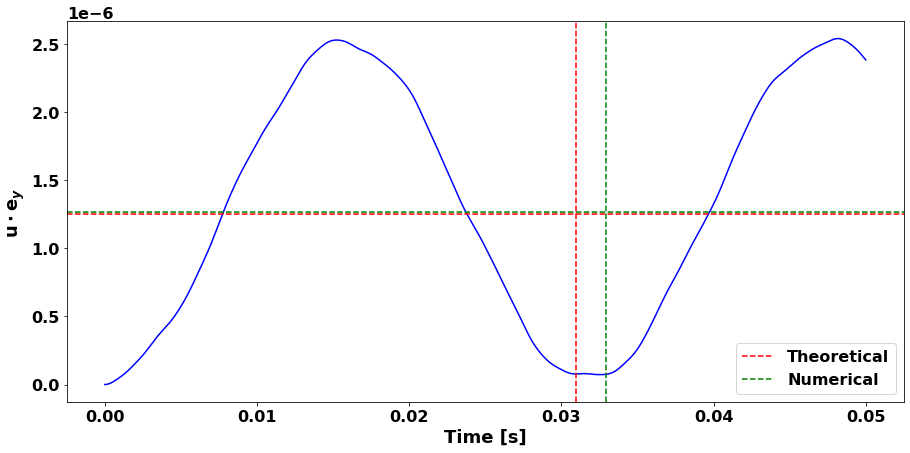

In [7]:
fig,ax=plt.subplots(figsize=(15,7))

axes=['\mathbf{e}_x', '\mathbf{e}_y', '\mathbf{e}_z']

for i in [1]:
    ax.plot(ma.time_array, ma.displacement_vectors[WHERE*3+i,:], 'b-')
    ax.set_ylabel('$\mathbf{u} \cdot'+'{}$'.format(axes[i]))
ax.set_xlabel('Time [s]')
ax.axvline(2*np.pi/omega, color='r', linestyle='--')
ax.axhline(max_d, color='r', linestyle='--', label="Theoretical")
ax.axvline(real_T, color='g', linestyle='--')
ax.axhline(real_max_d, color='g', linestyle='--', label="Numerical")
ax.legend(loc='lower right')
#plt.savefig('euler_bernoulli_theory.png', bbox_inches='tight')
plt.show()